In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')

In [2]:
df.columns = ['variance','skewness','curtosis','entropy','class']

In [3]:
features = ['variance','skewness', 'curtosis','entropy']

In [4]:
X = df[features]
Y = df['class']

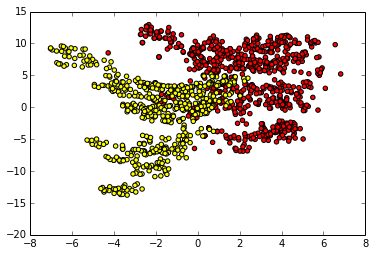

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[features[0]],X[features[1]], c=Y, cmap='autumn')

array([[<matplotlib.axes.AxesSubplot object at 0x7f145cad8190>,
        <matplotlib.axes.AxesSubplot object at 0x7f145bf52ad0>]], dtype=object)

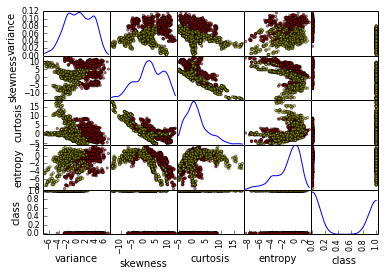

In [10]:
import pandas as pd
pd.scatter_matrix(df, cmap='autumn', c=Y, diagonal='kde')

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
#Have a look at the data with a partner, identify characteristics
#and predict which model or the first 5 will perform best.

#How many data points are there? 1300
#How many features? 4
#What type of problems did Naive Bayes algorithms work on? classification, countvectorizer num features
#After plotting do forges tend to be grouped? yes
#If not, will this hamper the nearest neighbor algorithm? no it won't hamper

In [12]:
classifiers = {'Logistic': LogisticRegression(),
               'GaussianNB':GaussianNB(),
               'BernoulliNB': BernoulliNB(),
               'KNeighbors': KNeighborsClassifier(),
               'RandomForest': RandomForestClassifier(),
               'Decision': DecisionTreeClassifier()}

In [15]:
from sklearn.metrics import roc_auc_score

for name, clf in classifiers.items():
    clf.fit(X,Y)
    Y_hat = clf.predict(X)
    score = roc_auc_score(Y, Y_hat)
    print "%s had an accuracy score of %0.2f"% (name, score)

BernoulliNB had an accuracy score of 0.84
RandomForest had an accuracy score of 1.00
GaussianNB had an accuracy score of 0.84
Logistic had an accuracy score of 0.99
Decision had an accuracy score of 1.00
KNeighbors had an accuracy score of 1.00


In [187]:
#with a partner adapt the above code to use ROC AUC curve
#Do the results change? No

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


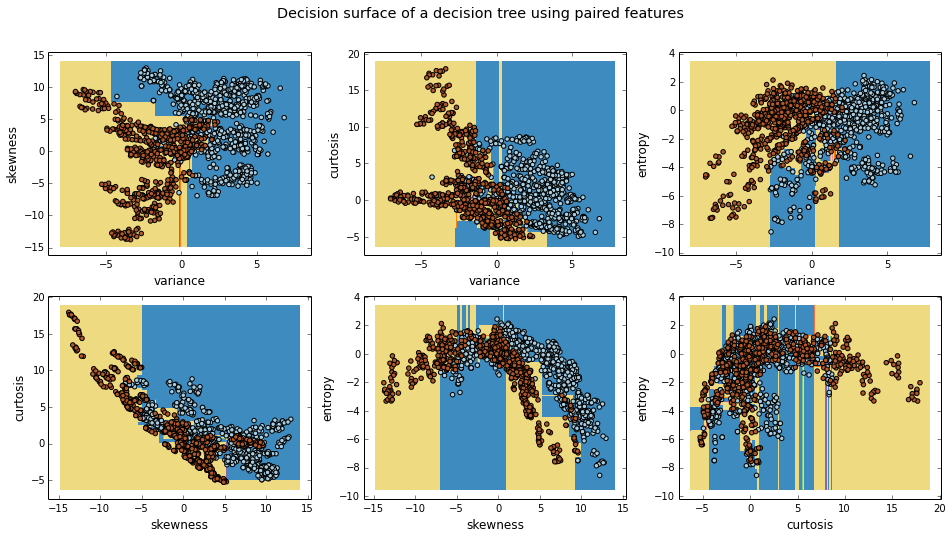

In [19]:
plotDecision()

In [189]:
#With your partner discuss the above graph.
#Which models may be overfitting the data? 6 ('small regions')
#5 ('thin lines'), 
#Bonus: Can you guess the depth of each decision tree using the graph?

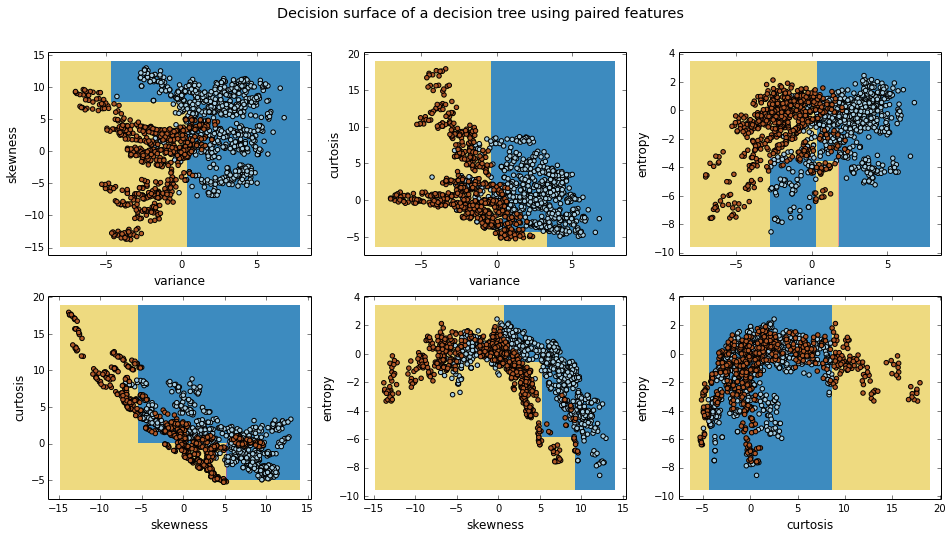

In [23]:
plotDecision(max_depth=3)

In [191]:
#With your partner compare the above plots to the first ones.
#Which one do you expect to have a better fit?
#model 1, model 2, and that's it.

In [35]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y)
for name, clf in classifiers2.items():
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test) #accuracy score
    #roc_auc_score - why did we do that? sklearn.metrics has many metrics!
    print "%s had an accuracy score of %0.2f"% (name, score)

BernoulliNB had an accuracy score of 0.86
RandomForest4 had an accuracy score of 0.97
Logistic had an accuracy score of 1.00
RandomForest5 had an accuracy score of 0.97
GaussianNB had an accuracy score of 0.86
RandomForest3 had an accuracy score of 0.92
RandomForest2 had an accuracy score of 0.92
RandomForest1 had an accuracy score of 0.88
KNeighbors had an accuracy score of 1.00
Decision5 had an accuracy score of 0.95
Decision4 had an accuracy score of 0.96
Decision3 had an accuracy score of 0.93
Decision2 had an accuracy score of 0.90
Decision1 had an accuracy score of 0.87


In [193]:
#Bonus: optimize the RandomForest and DecisionTree models for max_depth

In [34]:
#adapt model to test different max depth 1 through 10
#regresssion tree decision tree
classifiers2 = {'Logistic': LogisticRegression(),
               'GaussianNB':GaussianNB(),
               'BernoulliNB': BernoulliNB(),
               'KNeighbors': KNeighborsClassifier(),
               'RandomForest1': RandomForestClassifier(max_depth=1),
               'RandomForest2': RandomForestClassifier(max_depth=2),
               'RandomForest3': RandomForestClassifier(max_depth=3),
               'RandomForest4': RandomForestClassifier(max_depth=4),
               'RandomForest5': RandomForestClassifier(max_depth=5),
               'Decision1': DecisionTreeClassifier(max_depth=1),
               'Decision2': DecisionTreeClassifier(max_depth=2),
               'Decision3': DecisionTreeClassifier(max_depth=3),
               'Decision4': DecisionTreeClassifier(max_depth=4),
               'Decision5': DecisionTreeClassifier(max_depth=5)}

In [29]:
classifier3 = {'Randomforest':RandomForestClassifier,
               'DecisionTree':DecisionTreeClassifier}

In [39]:
#attempt to not manually type in each mode
#SUCCESS!

x_train, x_test, y_train, y_test = train_test_split(X,Y)
for name, model in classifier3.items():
    for i in range(1,21):
        clf=model(max_depth = i)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print "%s (%s) had an accuracy score of %0.4f"% (name,i, score)

Randomforest (1) had an accuracy score of 0.6968
Randomforest (2) had an accuracy score of 0.9155
Randomforest (3) had an accuracy score of 0.9475
Randomforest (4) had an accuracy score of 0.9388
Randomforest (5) had an accuracy score of 0.9883
Randomforest (6) had an accuracy score of 0.9942
Randomforest (7) had an accuracy score of 0.9883
Randomforest (8) had an accuracy score of 0.9971
Randomforest (9) had an accuracy score of 0.9942
Randomforest (10) had an accuracy score of 0.9913
Randomforest (11) had an accuracy score of 0.9883
Randomforest (12) had an accuracy score of 0.9971
Randomforest (13) had an accuracy score of 0.9971
Randomforest (14) had an accuracy score of 0.9942
Randomforest (15) had an accuracy score of 0.9971
Randomforest (16) had an accuracy score of 0.9942
Randomforest (17) had an accuracy score of 1.0000
Randomforest (18) had an accuracy score of 0.9942
Randomforest (19) had an accuracy score of 0.9971
Randomforest (20) had an accuracy score of 0.9913
DecisionT

In [18]:
def plotDecision(max_depth=None):
    plt.figure(figsize=(16,8))
    # Parameters
    n_classes = 2
    plot_colors = "bry"
    plot_step = 0.02

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        x = X[[features[i] for i in pair]]
        y = Y
        
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(x,y)

        # Plot the decision boundary
        plt.subplot(2, 3, pairidx + 1)
        x_min, x_max = X[features[pair[0]]].min() - 1, X[features[pair[0]]].max() + 1
        y_min, y_max = X[features[pair[1]]].min() - 1, X[features[pair[1]]].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

        plt.xlabel(features[pair[0]], size='large')
        plt.ylabel(features[pair[1]], size='large')
        plt.axis()

        # Plot the training points
        plt.scatter(X[features[pair[0]]], X[features[pair[1]]], c=Y,
                        cmap=plt.cm.Paired)

        plt.axis()
    plt.suptitle("Decision surface of a decision tree using paired features", size='x-large')
    plt.legend()
    plt.show()